# Getting started with INTEGRATE - no forward. no inversion - just analysis of the inversion

This notebook contains a simple example of geeting started with INTEGRATE, with no prior, forward and inverse modeling.

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    #%load_ext autoreload
    #%autoreload 2
    pass

In [2]:
import integrate as ig
import h5py
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case,  loadType='post')

f_post_h5 = files[-1]
with h5py.File(f_post_h5,'r') as f_post:
    f_prior_h5 = f_post['/'].attrs['f5_prior']
    f_data_h5 = f_post['/'].attrs['f5_data']

print("Using data file: %s" % f_data_h5)
print("Using prior file: %s" % f_prior_h5)
print("Using post file: %s" % f_post_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using prior file: prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Using post file: POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


## 1. Setup the prior model, $\rho(\mathbf{m},\mathbf{d})$
In this example we assume that realization of both 'm' and 'd' are avala simple layered prior model will be considered

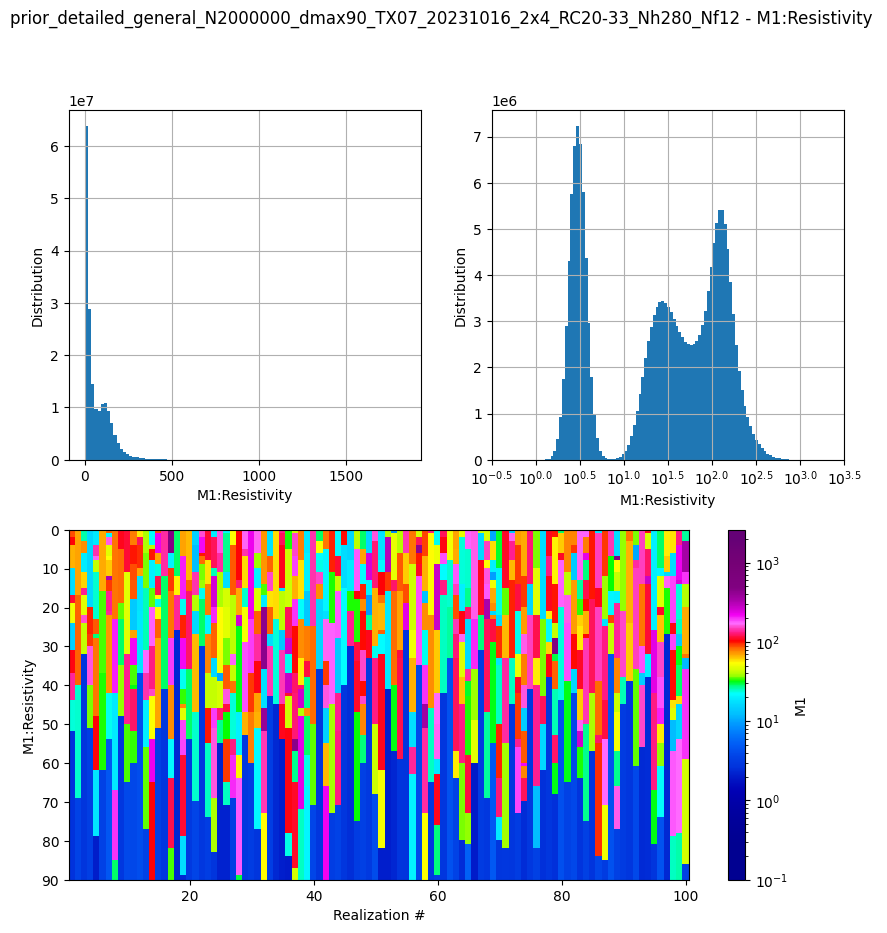

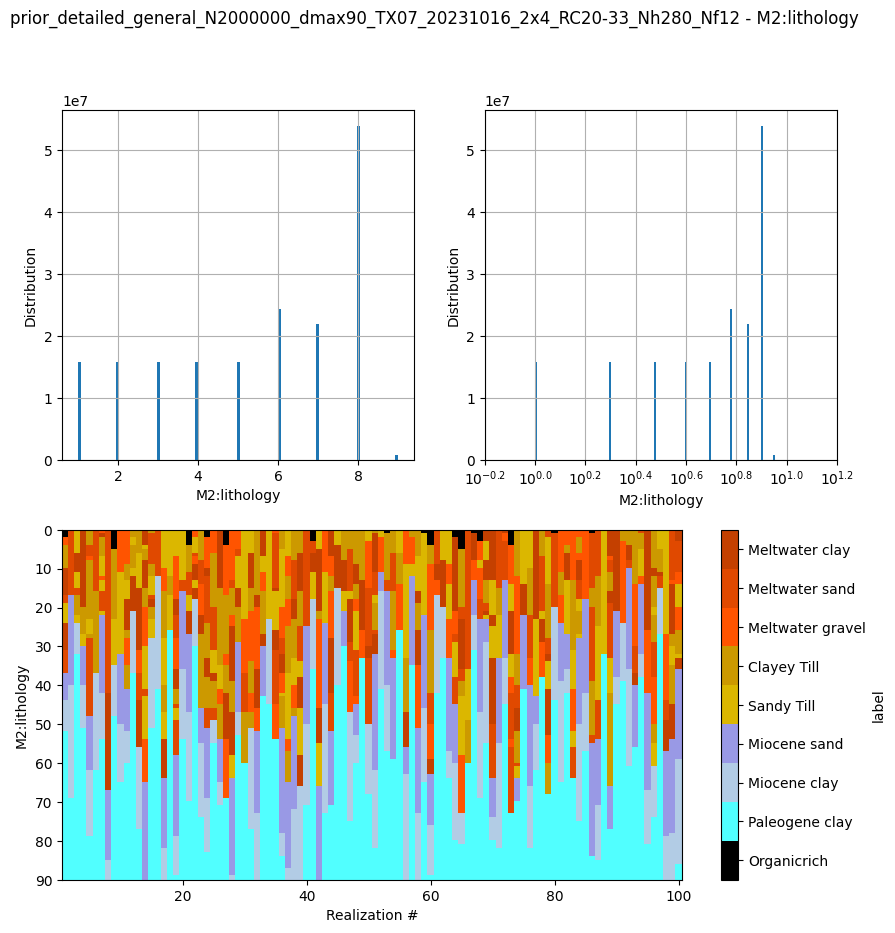

In [4]:
ig.plot_prior_stats(f_prior_h5)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [5]:
# The posterior distribution has already been sampled. To apply the rejection sampler again, uncomment below

#
# N_use = 10000
# f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5, N_use = N_use, parallel=parallel)

### Plot some statistic from $\sigma(\mathbf{m})$

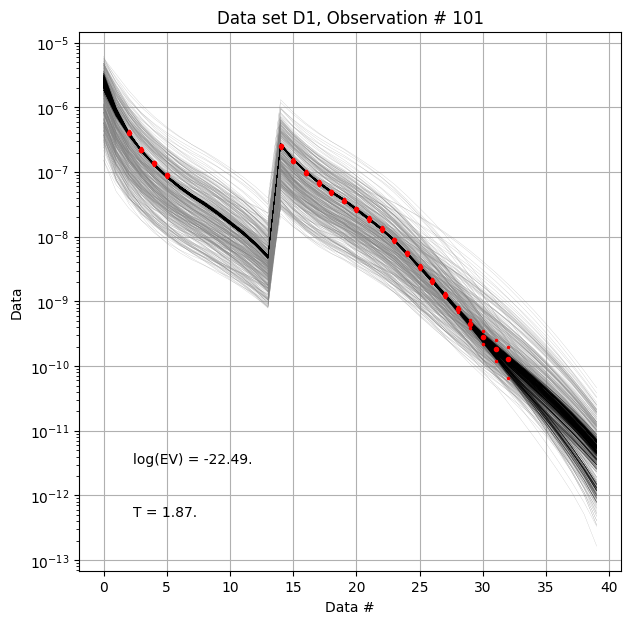

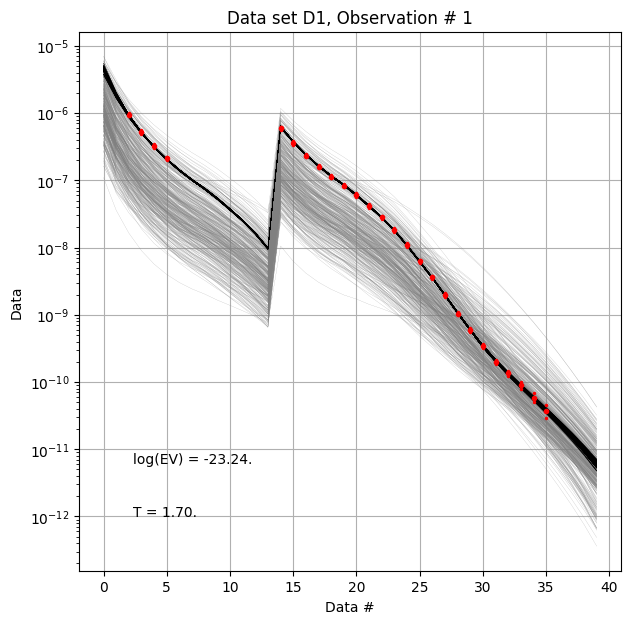

In [6]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

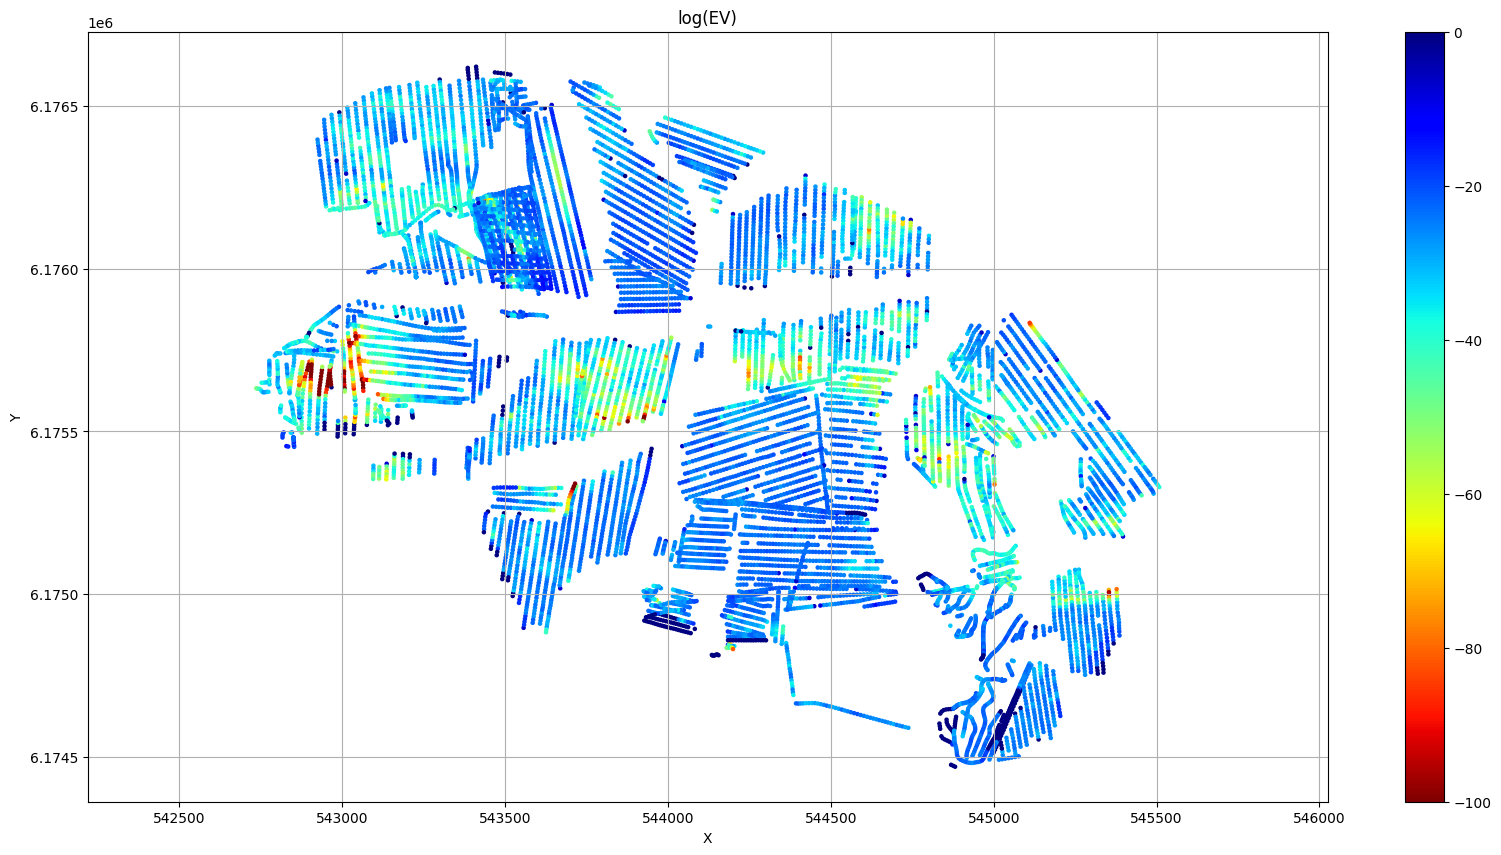

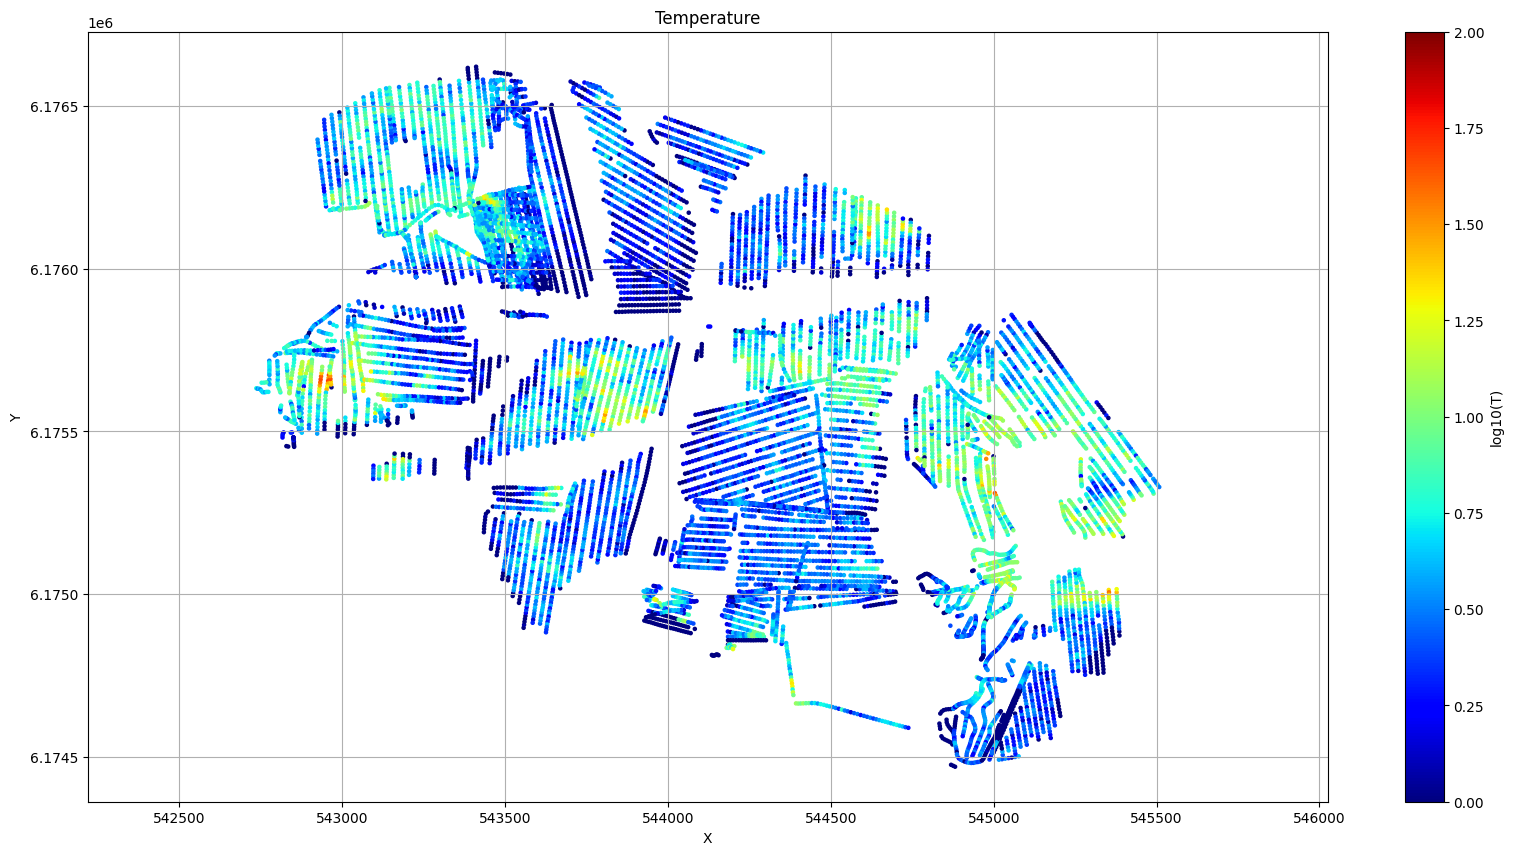

In [7]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='EV')
ig.plot_T_EV(f_post_h5, pl='T')

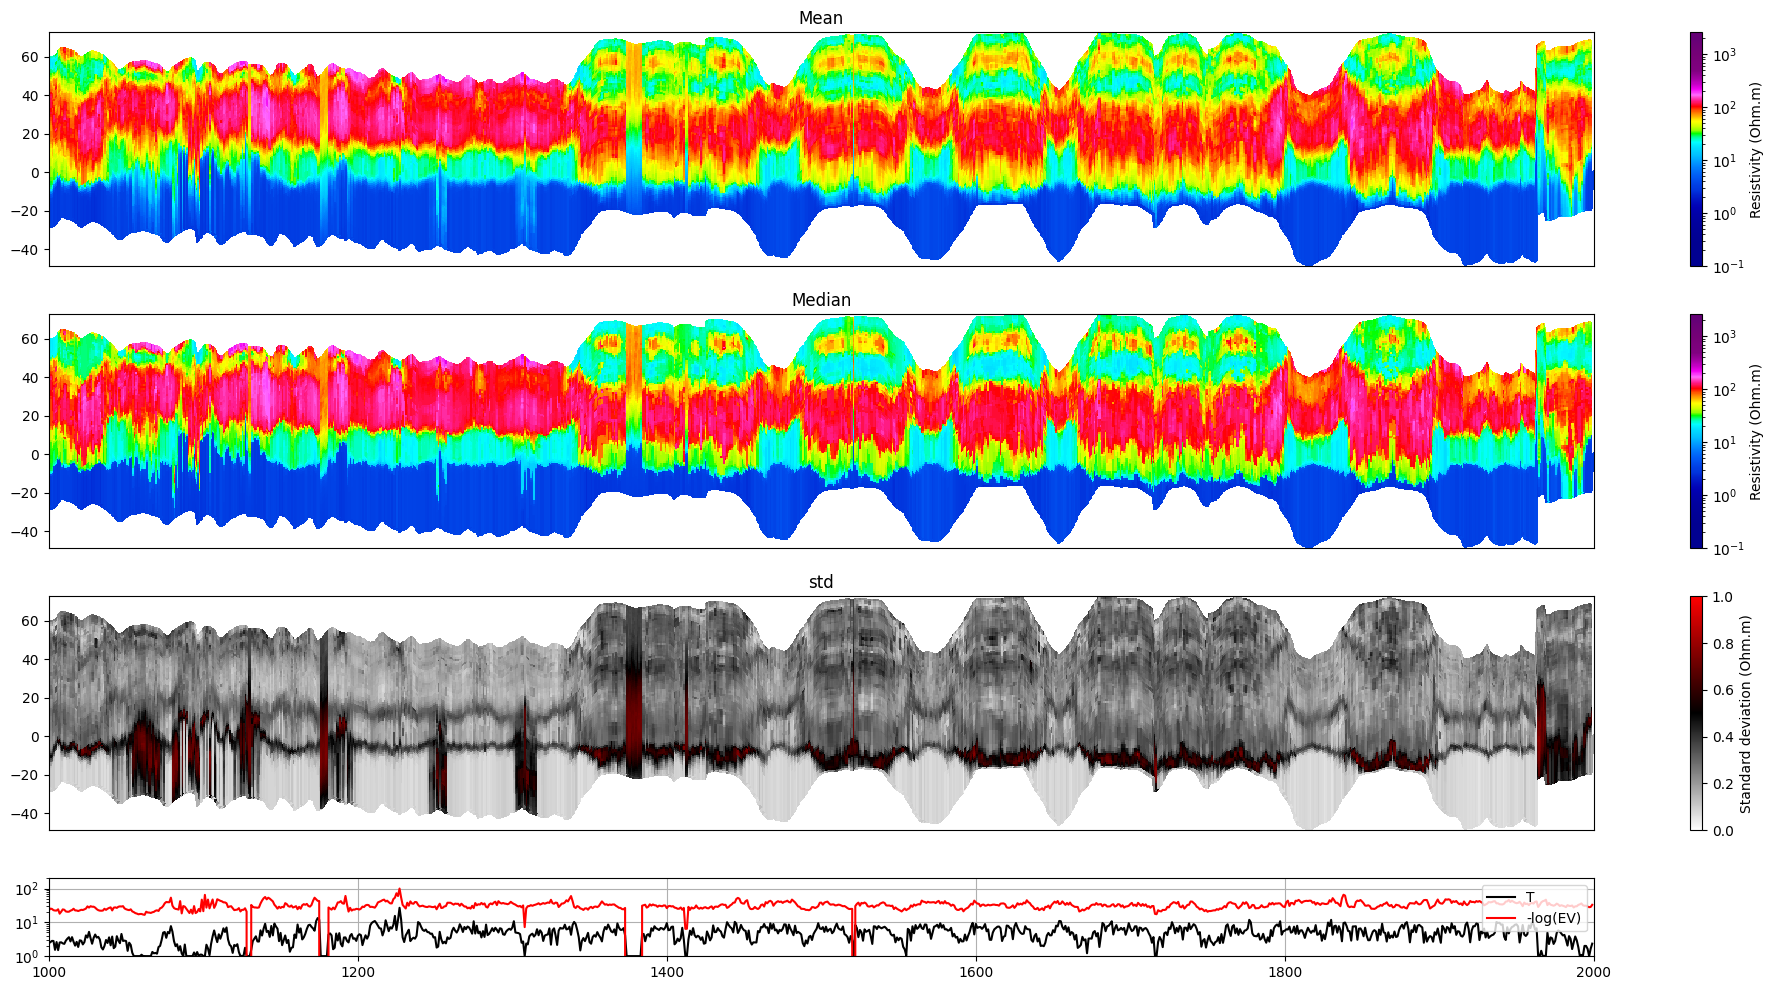

In [8]:
# Plot profile of model parameter type 1 (resistivity)
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

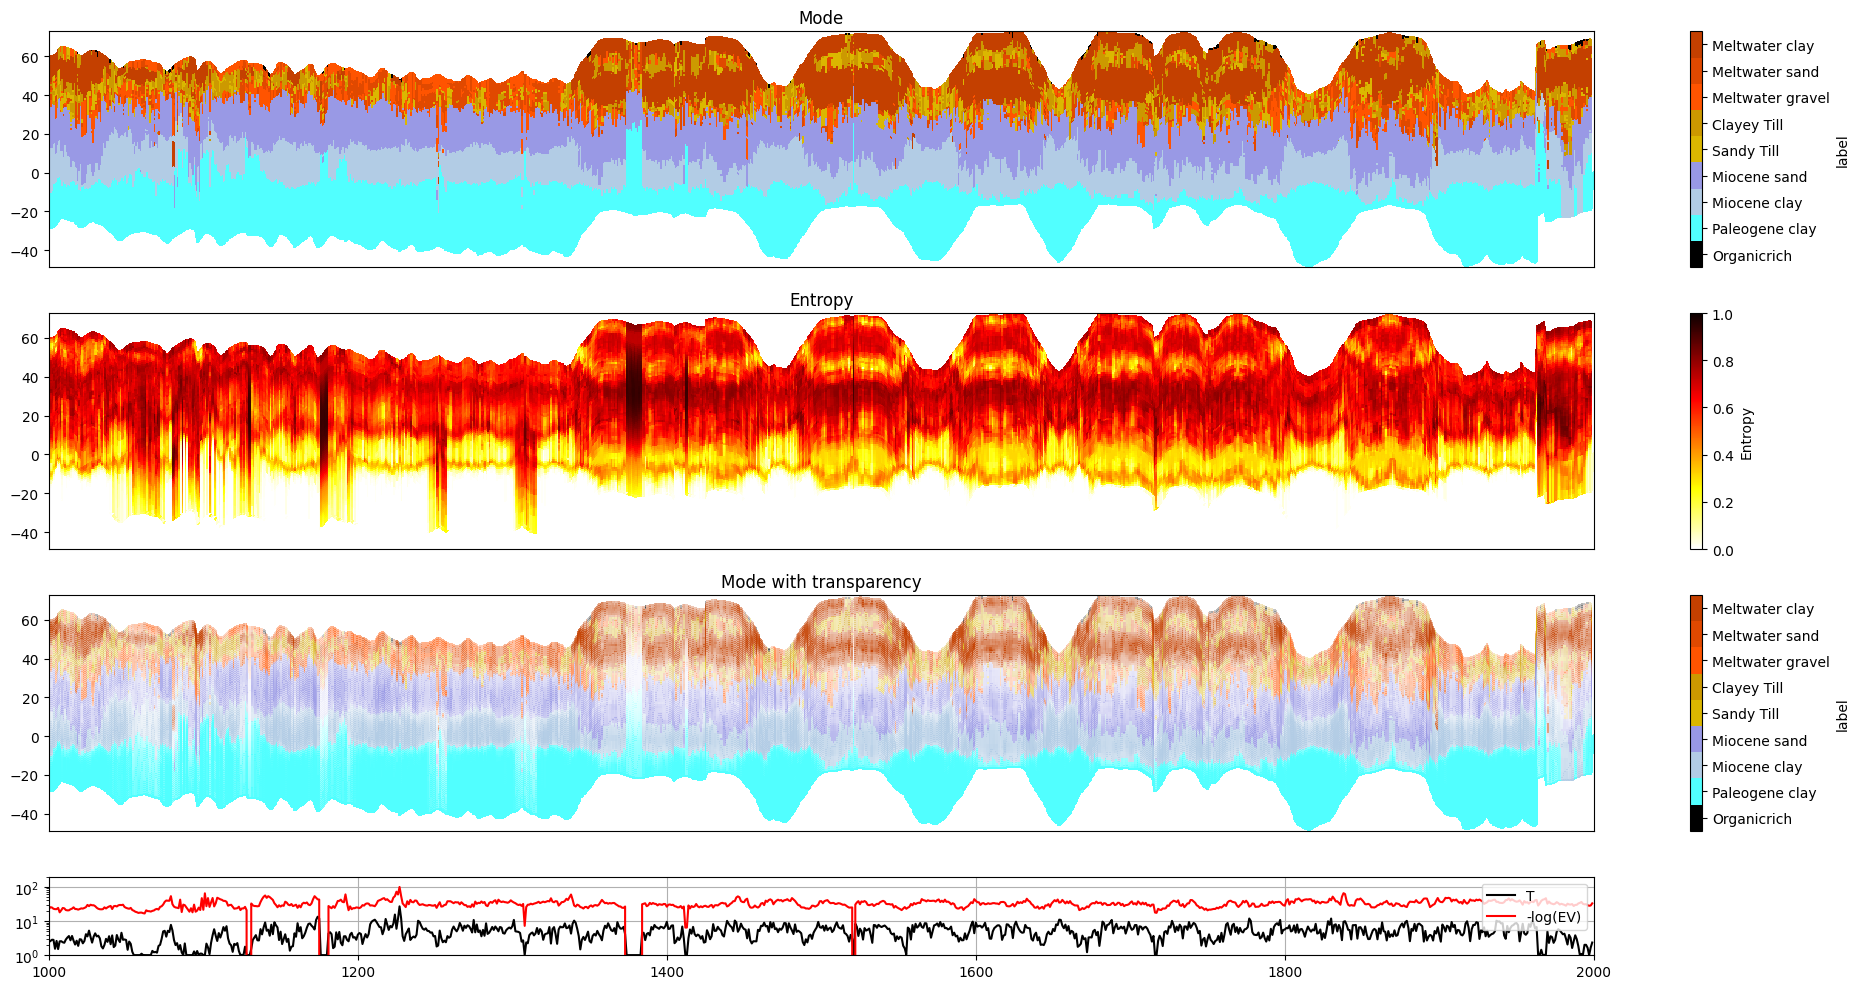

In [9]:
# Plot profile of model parameter type 2 (lithology)
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=2)

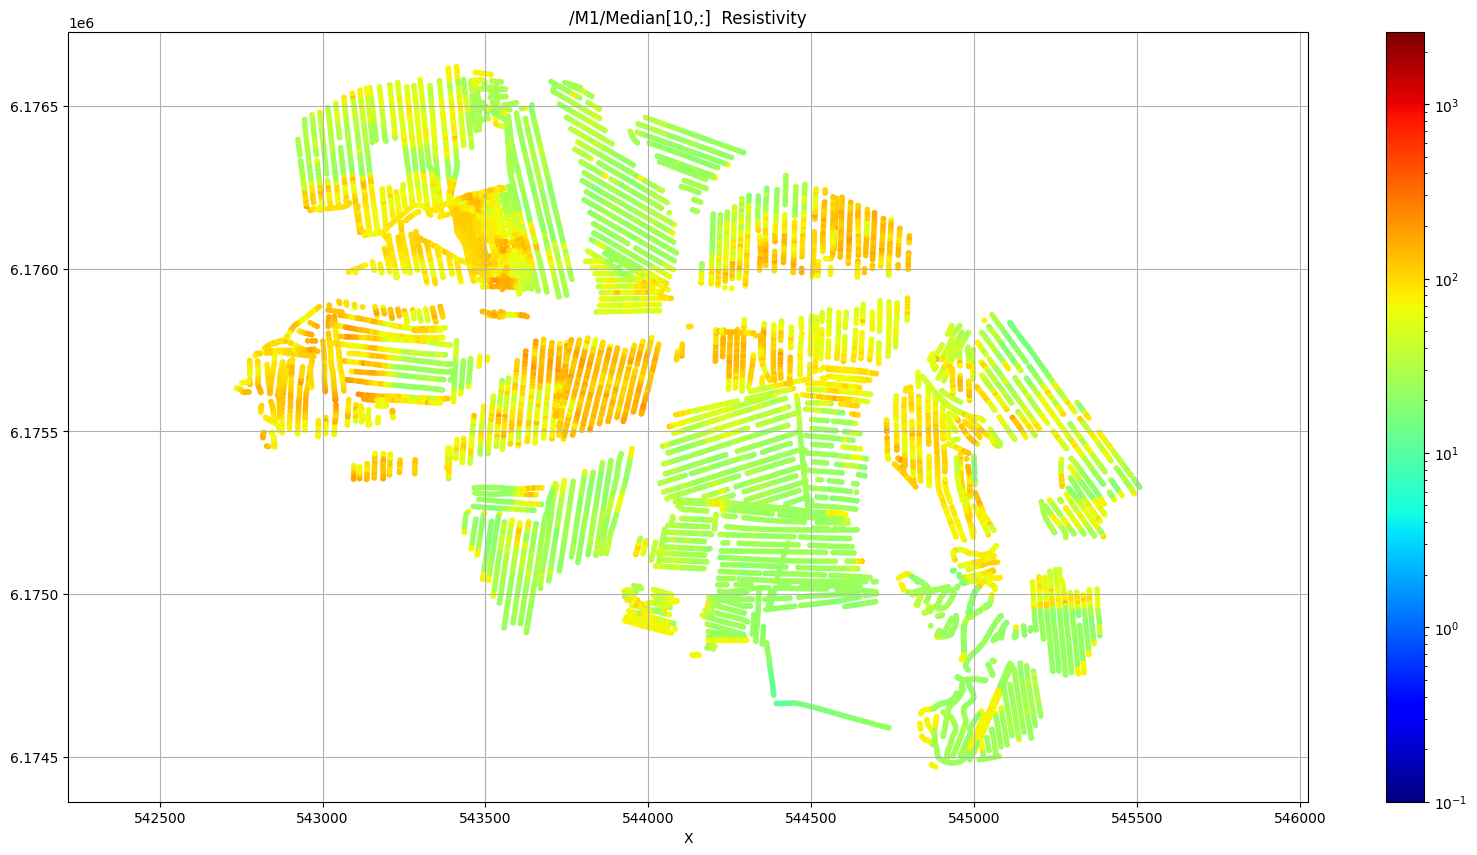

In [10]:
# Plot the Median  of the 1st type model parameter (resistivity) at at layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=10, key='Median', uselog=1, cmap='jet', s=10)

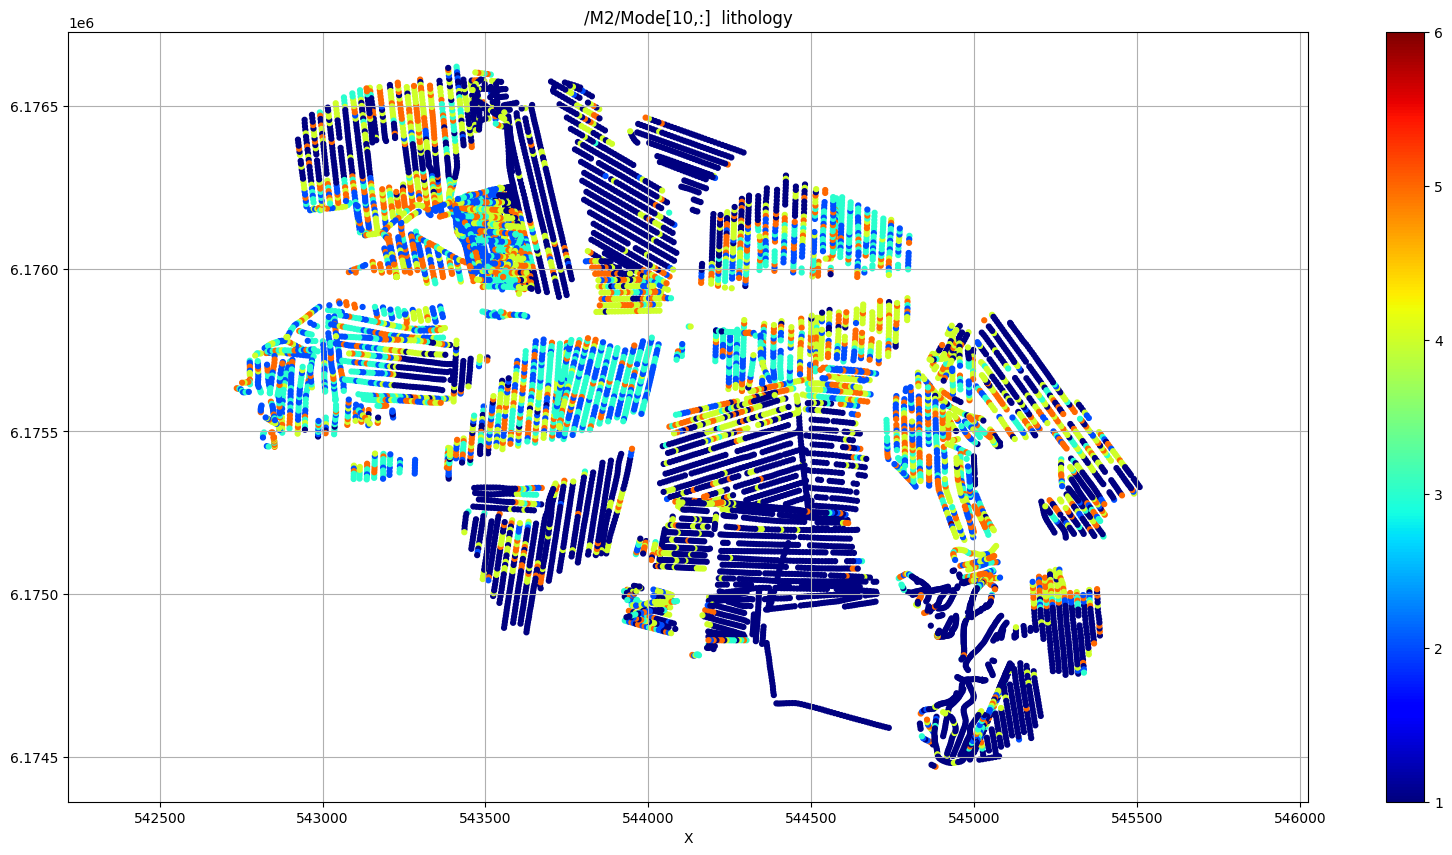

In [11]:
# Plot the mode of the 2nd type model parameter (lithology) at at layer 10
ig.plot_feature_2d(f_post_h5,im=2,iz=10,key='Mode', uselog=0, clim=[1,6], cmap='jet', s=12)